# Symmetric door

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
from tramp.experiments import run_experiments, qplot, plot_compare

## Model 

BinaryPrior(size=1000,p_pos=0.51)
LinearChannel(name=F,Nx=1600,Nz=1000,precompute_svd=True)
SymmetricDoorChannel(width=1.0)


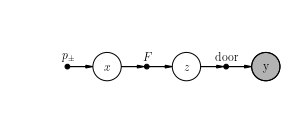

In [3]:
from tramp.models import glm_generative
from tramp.experiments import BayesOptimalScenario

alpha = 1.6
N = 1000
teacher = glm_generative(
    N=N, alpha=alpha, ensemble_type="gaussian", prior_type="binary",
    output_type="door", output_width=1., prior_p_pos=0.51
)

for factor in teacher.factors:
    print(factor)

scenario = BayesOptimalScenario(teacher, x_ids=["x", "z"])
scenario.setup(seed=42)
scenario.student.plot()

## EP dynamics

In [4]:
ep_evo = scenario.ep_convergence(
    metrics=["mse", "sign_mse"], damping=0.1, max_iter=40
)

INFO:tramp.algos.message_passing:init message dag with ConstantInit(a=0,b=0)
INFO:tramp.algos.message_passing:f_0->x damping=0.1
INFO:tramp.algos.message_passing:f_1->z damping=0.1
INFO:tramp.algos.message_passing:x<-f_1 damping=0.1
INFO:tramp.algos.message_passing:z<-f_2 damping=0.1
INFO:tramp.algos.message_passing:terminated after n_iter=40 iterations


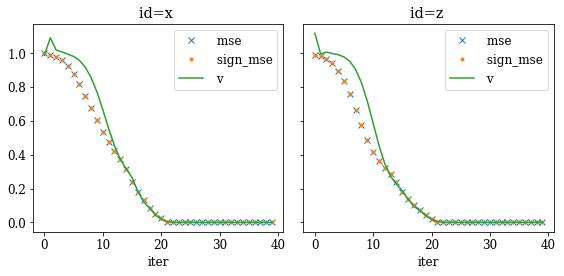

In [5]:
qplot(
    ep_evo, x="iter", 
    y=["mse", "sign_mse", "v"],  y_markers=["x", ".","-"], 
    column="id", y_legend=True
)

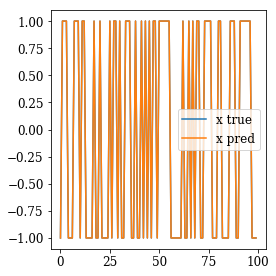

In [6]:
plot_compare(scenario.x_true["x"], scenario.x_pred["x"])

## MSE curve

See `door_mse_curves.py` for the code

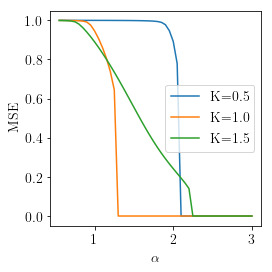

In [7]:
rename = {
    "alpha": r"$\alpha$", "output_width": "K",
    "a0": r"$a_0$", "v": "MSE", "n_iter":"iterations", 
    "x_id=":"", "p_pos":r"$p_+$", "criterion=":""
}
mse_curves = pd.read_csv("door_mse_curves.csv")
qplot(
    mse_curves, x="alpha", y="v", color="output_width",
    rename=rename, usetex=True, font_size=14
)

## Critical lines

See `door_critical_lines.py` for the code.

In [8]:
crit = pd.read_csv("door_critical_lines.csv")

The critical lines seem okay for the  "uninformed" case ($a_0=0.1$) with $p_+=0.51$.

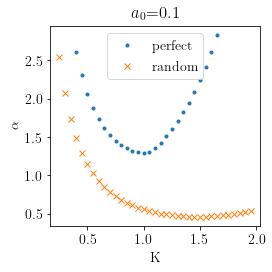

In [9]:
# Informed fixed point a0=1000 failed
qplot(
    crit, 
    x="output_width", y="alpha", column="a0", marker="criterion",
    rename=rename, usetex=True, font_size=14
)